In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import kaleido
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

import seaborn as sns
import statsmodels.formula.api as smf

import statsmodels.api as sm

import scipy.stats as stats

import torch

from groupBMC.groupBMC import GroupBMC


# Summary statistics

##  Demographics

In [2]:
participant_data = pd.read_csv("data/processed/participant_data.csv",index_col=0)
participant_data["participant_id"] = participant_data["participant"]
participant_data.drop(["participant"],axis=1,inplace=True)
participant_data

,depression,depressionCont,female,age,n_not_experienced,participant_id
0,0,12,1,29,9,1
1,0,0,0,41,9,2
2,0,13,1,38,6,3
3,1,31,0,67,18,4
4,0,5,0,40,21,5
...,...,...,...,...,...,...
107,1,36,0,22,9,108
108,0,13,0,21,5,109
109,0,2,1,20,2,110
110,1,15,1,34,9,111


In [3]:
participant_data.describe()

,depression,depressionCont,female,age,n_not_experienced,participant_id
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.455357,14.875000,0.517857,35.946429,8.750000,56.500000
std,0.500241,12.586368,0.501927,12.454486,5.903885,32.475632
min,0.000000,0.000000,0.000000,19.000000,0.000000,1.000000
25%,0.000000,4.000000,0.000000,27.000000,5.000000,28.750000
50%,0.000000,12.500000,1.000000,33.000000,7.500000,56.500000
75%,1.000000,23.750000,1.000000,42.000000,13.000000,84.250000
max,1.000000,45.000000,1.000000,72.000000,26.000000,112.000000


In [4]:
mask = (29 <= participant_data["depressionCont"]) * (participant_data["depressionCont"] <= 63)
print(participant_data[mask][["depressionCont"]].describe())
mask.sum()

       depressionCont
count       19.000000
mean        35.947368
std          4.415549
min         30.000000
25%         33.000000
50%         36.000000
75%         37.000000
max         45.000000


np.int64(19)

In [5]:
participant_data["depression"].sum()

np.int64(51)

In [6]:
mask_0 = participant_data["n_not_experienced"] > 0
participant_data[mask_0].describe()

,depression,depressionCont,female,age,n_not_experienced,participant_id
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.451923,14.826923,0.528846,35.798077,9.423077,56.836538
std,0.500093,12.573236,0.501584,12.645564,5.582031,32.459418
min,0.000000,0.000000,0.000000,19.000000,1.000000,1.000000
25%,0.000000,4.000000,0.000000,26.750000,5.000000,29.750000
50%,0.000000,12.500000,1.000000,33.000000,8.000000,56.500000
75%,1.000000,23.750000,1.000000,42.000000,13.000000,84.250000
max,1.000000,45.000000,1.000000,72.000000,26.000000,112.000000


In [7]:
participant_data[mask_0]["female"].sum(), mask_0.sum() - participant_data[mask_0]["female"].sum()

(np.int64(55), np.int64(49))

In [8]:
mask = (29 <= participant_data[mask_0]["depressionCont"]) * (participant_data[mask_0]["depressionCont"] <= 63)
print(participant_data[mask_0][mask][["depressionCont"]].describe())
mask.sum()

       depressionCont
count       17.000000
mean        36.294118
std          4.551987
min         30.000000
25%         33.000000
50%         36.000000
75%         37.000000
max         45.000000


np.int64(17)

In [9]:
# If False, perform Welch’s t-test, which does not assume equal population variance


res = stats.ttest_ind(participant_data[participant_data["n_not_experienced"] == 0]["female"],
                participant_data[participant_data["n_not_experienced"] > 0]["female"],
                equal_var=False)

print(res)


res = stats.ttest_ind(participant_data[participant_data["n_not_experienced"] == 0]["age"],
                participant_data[participant_data["n_not_experienced"] > 0]["age"],
                equal_var=False)

print(res)

res = stats.ttest_ind(participant_data[participant_data["n_not_experienced"] == 0]["depression"],
                participant_data[participant_data["n_not_experienced"] > 0]["depression"],
                equal_var=False)

print(res)

res = stats.ttest_ind(participant_data[participant_data["n_not_experienced"] == 0]["depressionCont"],
                participant_data[participant_data["n_not_experienced"] > 0]["depressionCont"],
                equal_var=False)

print(res)

TtestResult(statistic=np.float64(-0.8119548239524084), pvalue=np.float64(0.440178439638404), df=np.float64(8.045195676380864))
TtestResult(statistic=np.float64(0.549165749264697), pvalue=np.float64(0.5965805338682114), df=np.float64(8.77917610287367))
TtestResult(statistic=np.float64(0.24624405118400663), pvalue=np.float64(0.8117151518561654), df=np.float64(7.971939244895064))
TtestResult(statistic=np.float64(0.1354341712359833), pvalue=np.float64(0.8956366600516757), df=np.float64(7.945908761711743))


Whole data

Women = 58, Men = 54 
Age mean = 35.95 years old, std = 12.45, min = 19, max = 72
depression mean = 0.46, std = 0.50, 0  1
depressionCont mean = 14.875, std = 12.59, min = 0, max = 45 (21 questions 0-3 theoretical max is 63)
n not experienecd mean 8.75, std = 5.90, min = 0, max = 26

minimal depression (0-13): 61 individuals
14–19: mild depression: 14 individuals
20–28: moderate depression: 18 individuals
29–63: severe depression: 19


Only n not exp > 0

Women = 55, Men = 49 
Age mean = 35.80 years old, std = 12.65, min = 19, max = 72
depression mean = 0.45, std = 0.5, 0  1
depressionCont mean = 14.83, std = 12.57, min = 0, max = 45 (21 questions 0-3 theoretical max is 63)
n not exp mean = 9.42, std = 5.58, min = 1, max = 26 

minimal depression (0-13): 57 individuals
14–19: mild depression: 14 individuals
20–28: moderate depression: 16 individuals
29–63: severe depression: 17 individuals


Only n not exp == 0

Women = 3, Men = 5 
Age mean = 37.875 years old, std = 10.11, min = 24, max = 57
depression mean = 0.5, std = 0.53, 0  1
depressionCont mean = 15.50, std = 13.62, min = 0, max = 33 (21 questions 0-3 theoretical max is 63)
n not exp mean = 0, std = 0, min = 0, max = 0 

minimal depression (0-13): 4 individuals
14–19: mild depression: 0 individuals
20–28: moderate depression: 2 individuals
29–63: severe depression: 2 individuals


Welch's t-test between n not exp == 0 and n not exp > 0

female 
TtestResult(statistic=-0.8119548239524084, pvalue=0.440178439638404, df=8.045195676380864) t(8.05) = -0.812, p = 0.440

age
TtestResult(statistic=0.549165749264697, pvalue=0.5965805338682114, df=8.77917610287367) t(8.78) = 0.549, p = 0.597


depression
t(7.97) = 0.246, p = 0.812
TtestResult(statistic=np.float64(0.24624405118400663), pvalue=np.float64(0.8117151518561654), df=np.float64(7.971939244895064))


depressionCont
"A Welch two-samples t-test showed that the difference was statistically significant", t(7.95) = 0.135, p = 0.896

the null hypothesis that there is an equal mean along those three is not rejected.

In [10]:
new_mean_leaps_data = pd.read_csv("data/processed/participant_data/mean_leaps.csv",index_col=0)
_participant_data = pd.merge(participant_data,new_mean_leaps_data,how="left",on="participant_id")

print(_participant_data[_participant_data["n_not_experienced"] > 0][["mean_leaps"]].describe())

       mean_leaps
count  104.000000
mean     1.010440
std      0.028689
min      1.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      1.142857


in Only n not exp > 0

sample a participant, then sample a not experienced activity
n leaps mean = 1.01, std = 0.03, min = 1, max = 1.14 

In [11]:
fig = go.Figure()

fig.add_trace(
    go.Violin(
        x = participant_data[mask_0]["n_not_experienced"],
        side="positive",
        pointpos= -0.5,
        name = ""
    )
)
fig.update_traces(meanline_visible=True,
                  box_visible=True,
                  points='all', # show all points
                  jitter=0.1,  # add some jitter on points for better visibility
                  scalemode='count') #scale violin plot area with total count

fig.update_layout(
    title_text="N not experienced distribution",
    violingap=0, violingroupgap=0.5, violinmode='overlay',
    xaxis_title="n_not_experienced")
fig.show()

In [12]:
fig = go.Figure()

mask_minimal_depression = participant_data[mask_0]["depressionCont"] <= 13
mask_mild_depression = (14 <= participant_data[mask_0]["depressionCont"]) * (participant_data[mask_0]["depressionCont"] <= 19)
mask_moderate_depression = (20 <= participant_data[mask_0]["depressionCont"]) * (participant_data[mask_0]["depressionCont"] <= 28)
mask_severe_depression = (29 <= participant_data[mask_0]["depressionCont"]) * (participant_data[mask_0]["depressionCont"] <= 63)

fig.add_trace(
    go.Violin(
        x = participant_data[mask_0]["depressionCont"],
        side="positive",
        pointpos= -0.1,
        name = "all samples"
    )
)

fig.add_trace(
    go.Violin(
        x = participant_data[mask_0][mask_minimal_depression]["depressionCont"],
        side="positive",
        pointpos= -0.1,
        name = "regrouped samples"
    )
)

fig.add_trace(
    go.Violin(
        x = participant_data[mask_0][mask_mild_depression]["depressionCont"],
        side="positive",
        pointpos= -0.1,
        name = "regrouped samples"
    )
)

fig.add_trace(
    go.Violin(
        x = participant_data[mask_0][mask_moderate_depression]["depressionCont"],
        side="positive",
        pointpos= -0.1,
        name = "regrouped samples"
    )
)


fig.add_trace(
    go.Violin(
        x = participant_data[mask_0][mask_severe_depression]["depressionCont"],
        side="positive",
        pointpos= -0.1,
        name = "regrouped samples"
    )
)

fig.update_traces(meanline_visible=True,
                  box_visible=True,
                  points='all', # show all points
                  jitter=0.1,  # add some jitter on points for better visibility
                  scalemode='count') #scale violin plot area with total count
fig.update_traces(orientation='h', side='positive', width=3)

fig.update_layout(
    title_text="depressionCont distribution",
    violingap=0, violingroupgap=1, violinmode='overlay',
    xaxis_title="depression (continuous)")
fig.show()

### Define test / train sets

In [13]:
# use stratified random sampling

mask_minimal_depression = participant_data[mask_0]["depressionCont"] <= 13
mask_mild_depression = (14 <= participant_data[mask_0]["depressionCont"]) * (participant_data[mask_0]["depressionCont"] <= 19)
mask_moderate_depression = (20 <= participant_data[mask_0]["depressionCont"]) * (participant_data[mask_0]["depressionCont"] <= 28)
mask_severe_depression = (29 <= participant_data[mask_0]["depressionCont"]) * (participant_data[mask_0]["depressionCont"] <= 63)

pop_size = len(participant_data[mask_0])
print("whole population size:",pop_size)
print()

ratio_minimal = mask_minimal_depression.sum()/pop_size
ratio_mild = mask_mild_depression.sum()/pop_size
ratio_moderate = mask_moderate_depression.sum()/pop_size
ratio_severe = mask_severe_depression.sum()/pop_size

print("ratio minimal depression:",ratio_minimal)
print("ratio mild depression:",ratio_mild)
print("ratio moderate depression:",ratio_moderate)
print("ratio severe depression:",ratio_severe)

print()

test_size = int(pop_size * 0.1)

print("test_size",test_size)

n_samples_minimal = test_size * ratio_minimal
n_samples_mild = test_size * ratio_mild
n_samples_moderate = test_size * ratio_moderate
n_samples_severe = test_size * ratio_severe

print("n_samples_minimal depression:",n_samples_minimal)
print("n_samples mild depression:",n_samples_mild)
print("n_samples moderate depression:",n_samples_moderate)
print("n_samples severe depression:",n_samples_severe)

rng = np.random.default_rng(123)
rng.choice(np.arange(10),3,replace=False)

# applied for test_size = 10
participant_test = []
participant_test += list(rng.choice(participant_data[mask_0][mask_minimal_depression]["participant_id"].values,5,replace=False))
participant_test += list(rng.choice(participant_data[mask_0][mask_mild_depression]["participant_id"].values,1,replace=False))
participant_test += list(rng.choice(participant_data[mask_0][mask_moderate_depression]["participant_id"].values,2,replace=False))
participant_test += list(rng.choice(participant_data[mask_0][mask_severe_depression]["participant_id"].values,2,replace=False))
print("participant_test:",participant_test)

mask_test_set = participant_data[mask_0]["participant_id"].isin(participant_test)

whole population size: 104

ratio minimal depression: 0.5480769230769231
ratio mild depression: 0.1346153846153846
ratio moderate depression: 0.15384615384615385
ratio severe depression: 0.16346153846153846

test_size 10
n_samples_minimal depression: 5.480769230769232
n_samples mild depression: 1.346153846153846
n_samples moderate depression: 1.5384615384615385
n_samples severe depression: 1.6346153846153846
participant_test: [np.int64(23), np.int64(20), np.int64(112), np.int64(36), np.int64(29), np.int64(64), np.int64(21), np.int64(62), np.int64(103), np.int64(88)]


In [14]:
mask_test_set.sum()

np.int64(10)

In [15]:
participant_data[mask_0][mask_test_set]

,depression,depressionCont,female,age,n_not_experienced,participant_id
19,0,6,1,41,4,20
20,1,20,1,31,9,21
22,0,2,0,33,6,23
28,0,1,0,35,11,29
35,0,2,1,49,14,36
61,1,28,1,21,6,62
63,1,17,0,23,19,64
87,1,37,0,32,4,88
102,1,37,0,45,7,103
111,0,6,0,39,7,112


In [16]:
participant_data[mask_0][mask_test_set].describe()

,depression,depressionCont,female,age,n_not_experienced,participant_id
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.500000,15.600000,0.400000,34.900000,8.700000,55.800000
std,0.527046,14.369721,0.516398,8.924996,4.762119,35.288651
min,0.000000,1.000000,0.000000,21.000000,4.000000,20.000000
25%,0.000000,3.000000,0.000000,31.250000,6.000000,24.500000
50%,0.500000,11.500000,0.000000,34.000000,7.000000,49.000000
75%,1.000000,26.000000,1.000000,40.500000,10.500000,82.000000
max,1.000000,37.000000,1.000000,49.000000,19.000000,112.000000


In [17]:
participant_data[mask_0][~mask_test_set].describe()

,depression,depressionCont,female,age,n_not_experienced,participant_id
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.446809,14.744681,0.542553,35.893617,9.500000,56.946809
std,0.499828,12.451140,0.500857,13.011548,5.679145,32.346035
min,0.000000,0.000000,0.000000,19.000000,1.000000,1.000000
25%,0.000000,4.000000,0.000000,26.250000,5.000000,31.250000
50%,0.000000,12.500000,1.000000,33.000000,8.500000,56.500000
75%,1.000000,23.000000,1.000000,42.000000,13.000000,83.500000
max,1.000000,45.000000,1.000000,72.000000,26.000000,111.000000


In [18]:
(1-participant_data[mask_0][~mask_test_set]["female"]).sum()

np.int64(43)

In [19]:
# If False, perform Welch’s t-test, which does not assume equal population variance


res = stats.ttest_ind(participant_data[mask_0][mask_test_set]["female"],
                participant_data[mask_0][~mask_test_set]["female"],
                equal_var=False)
print(res)


res = stats.ttest_ind(participant_data[mask_0][mask_test_set]["age"],
                participant_data[mask_0][~mask_test_set]["age"],
                equal_var=False)

print(res)

res = stats.ttest_ind(participant_data[mask_0][mask_test_set]["depression"],
                participant_data[mask_0][~mask_test_set]["depression"],
                equal_var=False)

print(res)

res = stats.ttest_ind(participant_data[mask_0][mask_test_set]["depressionCont"],
                participant_data[mask_0][~mask_test_set]["depressionCont"],
                equal_var=False)

print(res)

TtestResult(statistic=np.float64(-0.8323024524092134), pvalue=np.float64(0.42312934607824004), df=np.float64(10.880964766595955))
TtestResult(statistic=np.float64(-0.3179411926806123), pvalue=np.float64(0.7554072792888791), df=np.float64(13.463435024643955))
TtestResult(statistic=np.float64(0.30489600830769964), pvalue=np.float64(0.7662431271596521), df=np.float64(10.79504808870899))
TtestResult(statistic=np.float64(0.18113139984529256), pvalue=np.float64(0.8597169376291701), df=np.float64(10.488633318078385))


Only n not exp > 0 test set

Women = 4, mean 0.40 std 0.52, Men = 6 
Age mean = 34.90 years old, std = 8.92, min = 21, max = 49
depression mean = 0.50, std = 0.52, min = 0, max = 1 
depressionCont mean = 15.60, std = 14.36, min = 1, max = 37 (21 questions 0-3 theoretical max is 63)
n not exp mean = 8.70, std = 4.76, min = 4, max = 19 

minimal depression (0-13): 57 individuals
14–19: mild depression: 14 individuals
20–28: moderate depression: 16 individuals
29–63: severe depression: 17 individuals


Only n not exp > 0 training set

Women = 51, mean 0.54 std 0.50, Men = 43 
Age mean = 35.89 years old, std = 13.01, min = 19, max = 72
depression mean = 0.47, std = 0.50, min = 0, max = 1 
depressionCont mean = 14.74, std = 12.45, min = 0, max = 45 (21 questions 0-3 theoretical max is 63)
n not exp mean = 9.50, std = 5.68, min = 1, max = 26 

minimal depression (0-13): 57 individuals
14–19: mild depression: 14 individuals
20–28: moderate depression: 16 individuals
29–63: severe depression: 17 individuals





Welch's t-test between n not exp > 0, train vs test

female 
t(10.88) = -0.832, p = 0.423

age
t(13.46) = -0.318, p = 0.755

depression
t(10.80) = 0.304, p = 0.766

depressionCont
"A Welch two-samples t-test showed that the difference was statistically significant", t(10.49) = 0.181, p = 0.860

the null hypothesis that there is an equal mean along those four is not rejected.

In [20]:
# IF NECESSARY
# move the basic graphs

if True:
    main_folder = "data/temp_1_3NN_3ExpNN"

    no_unexp_part_ids = set(participant_data[~mask_0]["participant_id"])
    test_part_ids = set(participant_data[mask_0][mask_test_set]["participant_id"])

    for file_name in os.listdir(main_folder):
        if file_name.split("_")[0] == "participant":
            participant_id = int(file_name.split('_')[-1])
            participant_graph = torch.load(os.path.join(main_folder,file_name),weights_only=False)
            
            if participant_id in test_part_ids:
                dst_path = os.path.join(main_folder,"test",file_name)
            elif participant_id in no_unexp_part_ids:
                dst_path = os.path.join(main_folder,"no_unexp",file_name)
            else:
                dst_path = os.path.join(main_folder,"train",file_name)
            torch.save(participant_graph,dst_path)

In [21]:
torch.load("data/temp_1_3NN_3ExpNN/train/participant_graph_1",weights_only=False)

/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Data(x=[38, 771], edge_index=[2, 88], edge_attr=[88, 1], y=[38, 1], x_names=[771], y_names=[1], edge_attr_names=[1], train_mask=[38], val_mask=[38], base_mask=[38], complete_train_mask=[38])

## Activities

In [22]:
full_node_data = pd.read_csv("data/processed/node_data/experienced.csv",index_col=0)
full_node_data.columns.tolist()

['participant_id', 'node_id', 'word', 'experienced']

In [23]:
participants_to_remove = participant_data[participant_data["n_not_experienced"] == 0]["participant_id"]

In [24]:
row_to_remove = full_node_data["participant_id"].isin(participants_to_remove)
print("at first len(full_node_data) =",len(full_node_data))
full_node_data = full_node_data[~row_to_remove].reset_index(drop=True)
full_node_data

at first len(full_node_data) = 6720


,participant_id,node_id,word,experienced
0,1,0,Art gallery,True
1,1,1,Autobiography book,True
2,1,2,Baking cookies,True
3,1,3,Board games,True
4,1,4,Book club,False
...,...,...,...,...
6235,112,55,Theater show,True
6236,112,56,Trivia night,True
6237,112,57,True crime TV series,True
6238,112,58,Walk in the park,True


In [25]:
full_node_data.groupby("word").sum()[["experienced"]]

,experienced
word,
Art gallery,89
Autobiography book,92
Baking cookies,97
Board games,103
Book club,51
Bread making,69
Brunch,100
Chat online,101
Cinema,104


In [26]:
activities_data = pd.DataFrame()
activities_data["mean_experienced"] = full_node_data.groupby("word").mean()[["experienced"]]
activities_data["std_experienced"] = full_node_data.groupby("word").std()[["experienced"]]
activities_data

,mean_experienced,std_experienced
word,,
Art gallery,0.855769,0.353025
Autobiography book,0.884615,0.321033
Baking cookies,0.932692,0.251767
Board games,0.990385,0.098058
Book club,0.490385,0.502328
Bread making,0.663462,0.474814
Brunch,0.961538,0.193239
Chat online,0.971154,0.168185
Cinema,1.000000,0.000000


In [27]:
activities_data = activities_data.sort_values("mean_experienced",ascending=False)

fig = go.Figure()

fig.add_trace(go.Bar(
    name='Control',
    x=activities_data.index.tolist(), 
    y=activities_data["mean_experienced"],
    error_y=dict(type='data', array=activities_data["std_experienced"])
))

fig.update_layout(barmode='group',
                  yaxis_title="estimate probability of being experienced")
fig.show()


# Model

## Retrieve data

In [28]:
all_data = []
folder_experiment_results = "experiments_results/no_validation_07/train"

all_parameters_kept = ["fake_param","src_edge_0_trained","edge_0_trained","src_content_0_trained","bias_0_trained","lengthscale_trained"]

for model_name in os.listdir(folder_experiment_results):
    print("model_name:",model_name)
    folder_path = os.path.join(folder_experiment_results,model_name,"processed")
    overall_summaries = pd.read_csv(os.path.join(folder_path,"overall_summaries.csv"),index_col=0)
    overall_summaries["participant_id"] = overall_summaries["participant_folder_name"].apply(lambda x: int(x.split("_")[1]))
    model_parameters_kept = list(set(all_parameters_kept).intersection(set(overall_summaries.columns)))

    participant_data = pd.read_csv("data/processed/participant_data.csv",index_col=0)
    participant_data["participant_id"] = participant_data["participant"]
    participant_data.drop(["participant"],axis=1,inplace=True)
    participant_data

    data = pd.merge(participant_data,overall_summaries,on="participant_id",how="right")
    data = data.rename(columns={"other.model_name":"model_id"})
    data = data.rename(columns={"model.name":"model_id"})

    # finally kept variables, 
    # to change to data[["participant_id","depression","depressionCont","train_MSE","train_AICc_0","model_id","model.n_free_params","train_residuals_shapiro_statistic","train_residuals_shapiro_pvalue"]]
    # also add the variables for parameter recovery
    all_data.append(data[["participant_id","depression","depressionCont","train_MAE","train_log_likelihood","train_AIC_0","train_AICc_0","model_id","model.n_free_params"]+model_parameters_kept])

all_data = pd.concat(all_data,axis=0).reset_index(drop=True)

# TODO: check shapiro

model_name: 2025-07-18_01-51__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False
model_name: 2025-07-18_07-46__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False
model_name: 2025-07-22_03-43__3NN_3ExpNN_DiffusionKernel
model_name: 2025-07-18_09-24__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False
model_name: 2025-07-18_08-48__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False
model_name: 2025-07-18_22-45__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False
model_name: 2025-07-18_05-28__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False
model_name: 2025-07-18_23-09__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liki

In [29]:
all_data

,participant_id,depression,depressionCont,train_MAE,train_log_likelihood,train_AIC_0,train_AICc_0,model_id,model.n_free_params,bias_0_trained,src_edge_0_trained,src_content_0_trained,edge_0_trained,lengthscale_trained
0,50,1,15,1.086551,-3.004572,6.009144,6.009144,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.000000,1.0,NaN
1,49,1,45,1.233197,-22.151817,44.303633,44.303633,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.000000,1.0,NaN
2,35,1,21,0.824471,-5.570978,11.141956,11.141956,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.000000,1.0,NaN
3,26,1,36,1.280677,-35.605878,71.211757,71.211757,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.000000,1.0,NaN
4,11,1,28,1.530232,-37.496755,74.993509,74.993509,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.000000,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,101,0,13,0.092188,2.999492,0.001015,24.001015,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.782835,0.159141,0.945406,1.0,NaN
1688,71,0,7,0.420421,-2.603682,11.207363,11.207363,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,0.758662,-0.281091,0.381419,1.0,NaN
1689,1,0,12,0.637563,-9.746487,25.492973,30.292973,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-1.423954,0.513115,1.760245,1.0,NaN
1690,22,1,31,0.413390,-5.622437,17.244874,23.244874,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.782223,0.979288,-0.269401,1.0,NaN


In [30]:
all_data["model_id"].unique()

array(['GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False',
       'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False',
       'MaternKernelModel',
       'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False',
       'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False',
       'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False',
       'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False',
       'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False',
       'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False',
       'MyRB

## Parameter recovery 

In [31]:
subdata = all_data.iloc[0:10,:]
subdata["train_MAE"] = 40
subdata["train_BIC_0"] = -100
fake_data = pd.concat([all_data,subdata],axis=0)
fake_data

/tmp/ipykernel_5427/2318357415.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5427/2318357415.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,participant_id,depression,depressionCont,train_MAE,train_log_likelihood,train_AIC_0,train_AICc_0,model_id,model.n_free_params,bias_0_trained,src_edge_0_trained,src_content_0_trained,edge_0_trained,lengthscale_trained,train_BIC_0
0,50,1,15,1.086551,-3.004572,6.009144,6.009144,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.0,1.0,NaN,NaN
1,49,1,45,1.233197,-22.151817,44.303633,44.303633,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.0,1.0,NaN,NaN
2,35,1,21,0.824471,-5.570978,11.141956,11.141956,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.0,1.0,NaN,NaN
3,26,1,36,1.280677,-35.605878,71.211757,71.211757,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.0,1.0,NaN,NaN
4,11,1,28,1.530232,-37.496755,74.993509,74.993509,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,30,1,23,40.000000,-22.302038,44.604075,44.604075,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.0,1.0,NaN,-100.0
6,55,1,26,40.000000,-20.561089,41.122178,41.122178,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.0,1.0,NaN,-100.0
7,95,0,6,40.000000,-20.702041,41.404083,41.404083,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.0,1.0,NaN,-100.0
8,51,0,0,40.000000,-9.333375,18.666750,18.666750,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,NaN,1.0,1.0,NaN,-100.0


In [32]:
# TODO: change fake_data to all_data

model_family_to_id = dict(
    GAT=[
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False',
        'GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False'
        ],
    DiffusionKernel=[
        "MaternKernelModel"
    ]
) 

model_family_to_parameters = dict(
    GAT=[
        "src_content_0_trained",
        "src_edge_0_trained",
        "edge_0_trained",
        "bias_0_trained"],
    DiffusionKernel=[
        "lengthscale_trained"
    ]
)

model_id_to_parameters_stats = {}
for model_family in model_family_to_id.keys():
    for model_id in model_family_to_id[model_family]:
        model_parameters_means = []
        model_parameters_stds = []
        for participant_id in all_data["participant_id"].unique():
            mask = (all_data["model_id"] == model_id) * (all_data["participant_id"] == participant_id)
            model_parameters_means.append(pd.DataFrame(all_data[mask][model_family_to_parameters[model_family]].mean()).T)
            model_parameters_stds.append(pd.DataFrame(all_data[mask][model_family_to_parameters[model_family]].std()).T)
        mean_model_parameters_means = pd.concat(model_parameters_means,axis=0).mean()
        mean_model_parameters_stds = pd.concat(model_parameters_stds,axis=0).mean()
        model_id_to_parameters_stats[model_id] = {
            "mean_mean":mean_model_parameters_means,
            "mean_std":mean_model_parameters_stds,
            "mean":model_parameters_means,
            "std":model_parameters_stds
        }

In [33]:
for model_family in model_family_to_id.keys():
    models_means = []
    models_stds = []
    models_ids = model_family_to_id[model_family]
    
    for model_id in models_ids:
        models_means.append(model_id_to_parameters_stats[model_id]["mean_mean"].values)
        models_stds.append(model_id_to_parameters_stats[model_id]["mean_std"].values)

    params_names = model_family_to_parameters[model_family]

    text = np.round(models_means,3).astype(str)
    models_stds = np.round(models_stds,3)
    text_models_stds = models_stds.astype(str)

    for i in range(text.shape[0]):
        for j in range(text.shape[1]):
            text[i,j] = "μ:" + text[i,j] + " - σ:" + text_models_stds[i,j]

    fig = go.Figure(data=go.Heatmap(
                        z= models_stds,
                        x = params_names,
                        y = models_ids,
                        text = text,
                        texttemplate = "%{text}",
                        textfont = {"size":20}))
    fig.update
    fig.show()

In [48]:
for model_family in model_family_to_id.keys():
    params_names = model_family_to_parameters[model_family]
    fig = make_subplots(rows=1, cols=len(params_names),subplot_titles=params_names)
    # Use x instead of y argument for horizontal plot
    for model_id in model_family_to_id[model_family]:
        for col_id, param_name in enumerate(params_names):
            fig.add_trace(go.Box(
                x=model_id_to_parameters_stats[model_id]["std"], 
                marker_color = '#636EFA',
                name=model_id),
            row=1, col=col_id+1)

    for col_id in range(2,len(params_names)+1):
        fig.update_yaxes(showticklabels=False, row=1, col=col_id)

    fig.update_layout(showlegend=False) #,plot_bgcolor='rgba(0, 0, 0, 0.05)'
    fig.show()

## Prepare data for performance comparison

In [49]:
all_data.columns

Index(['participant_id', 'depression', 'depressionCont', 'train_MAE',
       'train_log_likelihood', 'train_AIC_0', 'train_AICc_0', 'model_id',
       'model.n_free_params', 'src_edge_0_trained', 'edge_0_trained',
       'src_content_0_trained', 'bias_0_trained', 'lengthscale_trained'],
      dtype='object')

In [50]:
# for the performance after (when several models for same participant_id and model_id)

new_all_data = all_data.groupby(["participant_id","model_id"])[["depression","depressionCont","model.n_free_params","train_MAE","train_log_likelihood","train_AICc_0"]].mean()
new_all_data["depression"] = new_all_data["depression"].astype(int)
new_all_data["depressionCont"] = new_all_data["depressionCont"].astype(int)
new_all_data["model.n_free_params"] = new_all_data["model.n_free_params"].astype(int)
new_all_data = new_all_data.reset_index(level=[0, 1])
new_all_data

,participant_id,model_id,depression,depressionCont,model.n_free_params,train_MAE,train_log_likelihood,train_AICc_0
0,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,0,0.743706,-12.361815,24.723631
1,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,1,0.739625,-12.354589,27.280607
2,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,1,0.756043,-12.096284,26.763997
3,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,2,0.744223,-12.054009,30.108017
4,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,1,0.756025,-11.468458,25.508345
...,...,...,...,...,...,...,...,...
1593,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,2,0.491873,-8.654821,23.309642
1594,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,3,0.616353,-9.981914,30.763827
1595,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,3,0.330586,-7.333935,25.467870
1596,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,4,0.327724,-7.202399,32.404798


In [51]:
new_all_data["train_NLL"] = -new_all_data["train_log_likelihood"]
new_all_data

,participant_id,model_id,depression,depressionCont,model.n_free_params,train_MAE,train_log_likelihood,train_AICc_0,train_NLL
0,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,0,0.743706,-12.361815,24.723631,12.361815
1,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,1,0.739625,-12.354589,27.280607,12.354589
2,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,1,0.756043,-12.096284,26.763997,12.096284
3,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,2,0.744223,-12.054009,30.108017,12.054009
4,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,1,0.756025,-11.468458,25.508345,11.468458
...,...,...,...,...,...,...,...,...,...
1593,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,2,0.491873,-8.654821,23.309642,8.654821
1594,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,3,0.616353,-9.981914,30.763827,9.981914
1595,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,3,0.330586,-7.333935,25.467870,7.333935
1596,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,4,0.327724,-7.202399,32.404798,7.202399


In [85]:
from dash_src.utils import refactor_data

# TODO: change to AICc and log_likelihood, run the blocks after
refactored_data = refactor_data(new_all_data,
                                var="train_NLL",
                                join_on="participant_id",
                                group_by="model_id")

participant_id_to_best_model = refactored_data.idxmin(axis=1).apply(lambda x:x.split(":")[1])
participant_id_to_best_model.name = "best_model"
participant_id_to_best_model

participant_id
1      GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
2                                      MaternKernelModel
3      GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
4      GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
5                                      MaternKernelModel
                             ...                        
107                                    MaternKernelModel
108    GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
109    GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
110                                    MaternKernelModel
111    GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
Name: best_model, Length: 94, dtype: object

In [86]:
refactored_data

,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,train_NLL:MaternKernelModel
participant_id,,,,,,,,,,,,,,,,,
1,12.361815,12.354589,12.096284,12.054009,11.468458,11.052938,11.350043,12.541001,10.813866,10.644378,10.620480,10.504152,10.471288,10.410041,9.746487,8.933575,11.678066
2,17.320667,17.325856,15.814662,15.825693,17.124590,17.131954,16.220936,15.810704,16.068010,16.076633,15.728960,15.769425,16.418532,17.274886,15.749256,16.083724,15.460270
3,11.956163,11.944677,9.708013,9.708828,11.719926,11.703246,8.758130,8.601380,10.975508,10.970618,9.297774,9.303181,10.451568,10.454194,9.235654,8.505959,9.720591
4,27.034050,27.067888,27.012145,27.241553,23.151953,23.163758,29.414351,23.015773,22.444577,22.479349,21.222881,21.284662,22.544192,22.597063,21.008403,21.019410,21.395654
5,33.683673,33.705452,32.027006,31.979556,27.852244,27.898338,27.034583,26.343085,25.152920,25.208187,14.705775,15.104355,25.148467,25.373757,14.734508,14.680223,11.951379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,11.387718,11.384486,10.699773,10.683048,9.788841,9.789031,9.567043,9.556961,9.578132,9.566541,9.491728,9.486927,9.906398,10.013552,9.460779,9.612728,8.934556
108,15.399451,15.214547,14.274952,14.264442,10.517044,10.489900,10.515086,9.106838,10.680759,10.718648,9.920477,9.916675,10.291416,10.270051,10.115587,9.093889,10.943632
109,8.889894,8.887300,8.199086,8.179883,6.289960,6.297239,6.267607,6.121954,4.700818,4.733174,2.424541,2.342445,4.501538,4.564836,2.421258,2.646969,4.567249


In [87]:
refactored_data.loc[26]

train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False    35.605878
train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False     35.633990
train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False     30.594926
train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False      30.543024
train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False     28.354932
train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False      28.358040
train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False      27.728229
train_NLL:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fal

In [88]:
completed_participant_data = pd.merge(participant_data,participant_id_to_best_model,on="participant_id")
completed_participant_data

,depression,depressionCont,female,age,n_not_experienced,participant_id,best_model
0,0,12,1,29,9,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
1,0,0,0,41,9,2,MaternKernelModel
2,0,13,1,38,6,3,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
3,1,31,0,67,18,4,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
4,0,5,0,40,21,5,MaternKernelModel
...,...,...,...,...,...,...,...
89,0,12,0,31,8,107,MaternKernelModel
90,1,36,0,22,9,108,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
91,0,13,0,21,5,109,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...
92,0,2,1,20,2,110,MaternKernelModel


In [89]:
# one hot encoding
for model_name in completed_participant_data["best_model"].unique():
    completed_participant_data["best_model:"+model_name] = completed_participant_data["best_model"] == model_name
completed_participant_data

,depression,depressionCont,female,age,n_not_experienced,participant_id,best_model,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,best_model:MaternKernelModel,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False
0,0,12,1,29,9,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,True,False,False,False,False,False,False,False,False
1,0,0,0,41,9,2,MaternKernelModel,False,True,False,False,False,False,False,False,False
2,0,13,1,38,6,3,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,True,False,False,False,False,False,False,False,False
3,1,31,0,67,18,4,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,False,False,True,False,False,False,False,False,False
4,0,5,0,40,21,5,MaternKernelModel,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,12,0,31,8,107,MaternKernelModel,False,True,False,False,False,False,False,False,False
90,1,36,0,22,9,108,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,True,False,False,False,False,False,False,False,False
91,0,13,0,21,5,109,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,False,False,False,True,False,False,False,False,False
92,0,2,1,20,2,110,MaternKernelModel,False,True,False,False,False,False,False,False,False


## Best fitting model

In [90]:
# completed_participant_data already only have train (if it's what is studied) 

proba_depression = (completed_participant_data["depression"] > 0).sum()/len(completed_participant_data)
proba_depression

np.float64(0.44680851063829785)

In [91]:
completed_participant_data

,depression,depressionCont,female,age,n_not_experienced,participant_id,best_model,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,best_model:MaternKernelModel,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False
0,0,12,1,29,9,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,True,False,False,False,False,False,False,False,False
1,0,0,0,41,9,2,MaternKernelModel,False,True,False,False,False,False,False,False,False
2,0,13,1,38,6,3,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,True,False,False,False,False,False,False,False,False
3,1,31,0,67,18,4,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,False,False,True,False,False,False,False,False,False
4,0,5,0,40,21,5,MaternKernelModel,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,12,0,31,8,107,MaternKernelModel,False,True,False,False,False,False,False,False,False
90,1,36,0,22,9,108,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,True,False,False,False,False,False,False,False,False
91,0,13,0,21,5,109,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,False,False,False,True,False,False,False,False,False
92,0,2,1,20,2,110,MaternKernelModel,False,True,False,False,False,False,False,False,False


### Best fitting model - overall

In [93]:
candidate_models = []
for model_name in completed_participant_data["best_model"].unique():
    candidate_models.append("best_model:"+model_name)


proba_best_model_c_overall = completed_participant_data[candidate_models].sum()
proba_best_model_c_overall.name = "overall"
proba_best_model_c_overall = pd.DataFrame(proba_best_model_c_overall).T.reset_index(drop=True)

proba_best_model_c_overall = proba_best_model_c_overall/len(completed_participant_data)

fig = go.Figure()
for col_name in proba_best_model_c_overall.columns:
    model_name = col_name.split(":")[1]
    fig.add_trace(go.Bar(
        x=proba_best_model_c_overall.index, 
        y=proba_best_model_c_overall[col_name],
        name=model_name
    ))
fig.update_layout(barmode='group',
                  yaxis_title="Percentage of participants best fit by the model",
                  yaxis_range=[0,1])
fig.show()

proba_best_model_c_depression = {}
for model_name in completed_participant_data["best_model"].unique():
    proba_best_model_c_depression[f"best_model:{model_name}"] = [(completed_participant_data[f"best_model:{model_name}"] * completed_participant_data["depression"]).sum() / completed_participant_data["depression"].sum()]
proba_best_model_c_depression = pd.DataFrame(proba_best_model_c_depression).reset_index(drop=True)


fig = go.Figure()

for col_name in proba_best_model_c_depression.columns:
    model_name = col_name.split(":")[1]
    fig.add_trace(go.Bar(
        x=proba_best_model_c_depression.index, 
        y=proba_best_model_c_depression[col_name],
        name=model_name
    ))
fig.update_layout(barmode='group',
                  yaxis_title="Percentage of participants best fit by the model (only depressed)",
                  yaxis_range=[0,1])
fig.show()

proba_best_model_c_not_depression = {}
for model_name in completed_participant_data["best_model"].unique():
    proba_best_model_c_not_depression[f"best_model:{model_name}"] = [(completed_participant_data[f"best_model:{model_name}"] *(1 - completed_participant_data["depression"])).sum() / (1 - completed_participant_data["depression"]).sum()]
proba_best_model_c_not_depression = pd.DataFrame(proba_best_model_c_not_depression).reset_index(drop=True)


fig = go.Figure()

for col_name in proba_best_model_c_not_depression.columns:
    model_name = col_name.split(":")[1]
    fig.add_trace(go.Bar(
        x=proba_best_model_c_not_depression.index, 
        y=proba_best_model_c_not_depression[col_name],
        name=model_name
    ))
fig.update_layout(barmode='group',
                  yaxis_title="Percentage of participants best fit by the model (only not depressed)",
                  yaxis_range=[0,1])
fig.show()


proba_depression_c_best_model = (proba_best_model_c_depression / proba_best_model_c_overall) * proba_depression

fig = go.Figure()

for col_name in proba_depression_c_best_model.columns:
    model_name = col_name.split(":")[1]
    fig.add_trace(go.Bar(
        x=proba_depression_c_best_model.index, 
        y=proba_depression_c_best_model[col_name],
        name=model_name
    ))
fig.update_layout(barmode='group',
                  yaxis_title="Probability of being depressed being best fitted by model",
                  yaxis_range=[0,1])
fig.show()

In [60]:
refactored_data

,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,train_AICc_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,train_AICc_0:MaternKernelModel
participant_id,,,,,,,,,,,,,,,,,
1,24.723631,27.280607,26.763997,30.108017,25.508345,28.105877,28.700087,35.882001,24.199160,27.288755,27.240961,31.808303,26.942575,31.620081,30.292973,35.867150,25.927560
2,34.641334,37.223140,34.200753,37.651386,36.820608,40.263908,38.441872,42.421407,34.707448,38.153265,37.457920,42.338849,38.837064,45.349772,42.298512,50.167447,33.491968
3,23.912325,26.889353,22.416025,27.417657,26.439853,31.406493,25.516260,35.202760,24.951017,29.941235,26.595547,36.606361,28.903136,38.908387,36.471308,65.011919,22.441181
4,54.068099,56.385776,56.274289,59.283106,48.553906,51.127516,63.628702,53.745832,47.139155,49.758697,47.245761,50.283610,49.888383,52.908411,49.731091,53.115743,45.041308
5,67.367346,69.621430,66.264538,68.625779,57.915015,60.463343,58.735833,60.097934,52.516366,55.083040,34.078217,37.620474,54.963601,58.159278,36.880780,39.860445,26.113285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,22.775436,25.435638,24.066213,27.766097,22.244349,25.978062,25.534087,31.113921,21.822931,25.533082,25.383455,30.973853,26.212797,32.027104,30.921559,40.558789,20.535778
108,30.798902,33.000523,31.121332,34.528883,23.605516,26.979801,27.030172,29.013676,23.932947,27.437295,25.840955,30.633350,26.582831,31.340103,31.031175,36.187778,24.458693
109,17.779788,21.107934,19.731505,26.359767,15.913253,22.594478,22.535214,42.243908,12.734969,19.466348,14.849082,34.684890,19.003076,39.129671,34.842516,13.293938,12.467831


In [95]:
# keep only log likelihood for refactored data

refactored_data = refactor_data(new_all_data,
                                var="train_log_likelihood",
                                join_on="participant_id",
                                group_by="model_id")

models_ids = refactored_data.rename(columns=lambda x:x.split(":")[-1]).columns.tolist()
L = refactored_data.values.T

overall_result_bmc = GroupBMC(L).get_result()

print("overall_result_bmc.protected_exceedance_probability\n",overall_result_bmc.protected_exceedance_probability)
fig = go.Figure()
for i,model_id in enumerate(models_ids):
    fig.add_trace(go.Bar(
        y=[overall_result_bmc.protected_exceedance_probability[i]],
        name=model_id
    ))
# Change the bar mode
fig.update_layout(barmode='group',
                  yaxis_title="protected_exceedance_probability",
                  yaxis_range=[0,1])
fig.show()



overall_result_bmc.protected_exceedance_probability
 [2.46815341e-22 2.46815342e-22 2.46815358e-22 2.46815359e-22
 2.46815356e-22 2.46815355e-22 2.46815381e-22 2.46815379e-22
 2.46815389e-22 2.46815392e-22 2.46815435e-22 2.46815441e-22
 2.46815436e-22 2.46815427e-22 8.01437095e-04 9.99198563e-01
 2.46815469e-22]


In [62]:
refactored_data.T

participant_id,1,2,3,4,5,6,8,9,10,11,...,101,102,104,105,106,107,108,109,110,111
train_log_likelihood:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False,-12.361815,-17.320667,-11.956163,-27.034050,-33.683673,-14.095797,-22.238353,-23.920191,-24.211376,-37.496755,...,-5.672440,-13.118526,-8.116022,-12.072443,-8.889560,-11.387718,-15.399451,-8.889894,-1.359740,-16.868825
train_log_likelihood:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False,-12.354589,-17.325856,-11.944677,-27.067888,-33.705452,-14.029533,-22.070459,-23.840889,-24.220537,-37.364096,...,-5.655428,-13.017274,-8.120569,-12.072290,-8.866455,-11.384486,-15.214547,-8.887300,-1.351777,-16.578700
train_log_likelihood:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False,-12.096284,-15.814662,-9.708013,-27.012145,-32.027006,-10.758442,-17.371793,-23.903436,-20.472056,-37.354434,...,-5.098996,-8.670485,-7.735135,-8.306330,-4.329991,-10.699773,-14.274952,-8.199086,1.333874,-11.037416
train_log_likelihood:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False,-12.054009,-15.825693,-9.708828,-27.241553,-31.979556,-10.756074,-17.927880,-23.830034,-20.473098,-37.304248,...,-5.050885,-8.672102,-7.757200,-8.289894,-4.356224,-10.683048,-14.264442,-8.179883,1.299929,-11.063367
train_log_likelihood:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,-11.468458,-17.124590,-11.719926,-23.151953,-27.852244,-13.736778,-18.291714,-18.940542,-19.922349,-27.149349,...,-4.428777,-12.437385,-7.539744,-8.125438,-7.482576,-9.788841,-10.517044,-6.289960,2.251547,-11.513053
train_log_likelihood:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False,-11.052938,-17.131954,-11.703246,-23.163758,-27.898338,-12.944998,-18.284277,-18.973366,-19.915638,-27.053842,...,-4.456648,-12.428160,-7.538255,-8.130687,-7.552868,-9.789031,-10.489900,-6.297239,2.209958,-11.492503
train_log_likelihood:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,-11.350043,-16.220936,-8.758130,-29.414351,-27.034583,-10.757558,-13.064465,-23.825458,-19.447778,-26.532868,...,-3.457474,-8.497458,-7.799092,-1.128448,-3.673614,-9.567043,-10.515086,-6.267607,1.180156,-11.312108
train_log_likelihood:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,-12.541001,-15.810704,-8.601380,-23.015773,-26.343085,-10.890844,-13.058809,-23.869970,-17.532823,-33.419546,...,-3.360375,-8.551576,-7.719398,-8.848430,-3.636974,-9.556961,-9.106838,-6.121954,1.239948,-11.297541
train_log_likelihood:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False,-10.813866,-16.068010,-10.975508,-22.444577,-25.152920,-11.089772,-9.760753,-17.790087,-14.340619,-20.877155,...,2.671871,-10.773467,-7.696774,-3.384798,-5.324933,-9.578132,-10.680759,-4.700818,1.262633,-8.862622
train_log_likelihood:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False,-10.644378,-16.076633,-10.970618,-22.479349,-25.208187,-11.100675,-9.800550,-17.829441,-14.289638,-20.770161,...,2.865913,-10.709547,-7.705372,-3.389853,-5.349798,-9.566541,-10.718648,-4.733174,1.206674,-8.705510


In [63]:
partition_family = [[]]

partition_bias_used = [[]]
partition_att_liking_used = [[]]
partition_amp_liking_used = [[]]
partition_edge_sim_used = [[]]
partition_any_param_used = [[]]

In [65]:
# TODO: should be a bar plot
partition_bias_used = [[1, 2], [3]] # partitions on models
overall_result_bmc_bias_used = GroupBMC(L, partitions=partition_bias_used).get_result()

_, ax = plt.subplots()
ax.errorbar(np.arange(len(partition_bias_used)), overall_result_bmc_bias_used.frequency_mean, overall_result_bmc_bias_used.frequency_var)
ax.set_xticks([0, 1])
ax.set_xticklabels([1, 2])
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Posterior model frequency')
plt.show()

ValueError: operands could not be broadcast together with shapes (3,) (17,) 

### Best fitting model - depressionCont

In [66]:
sum_participant_data = completed_participant_data.groupby("depressionCont").sum()
sum_participant_data = sum_participant_data.drop(["depression","female","age","n_not_experienced","participant_id","best_model"],axis=1)
depressionCont_to_n_participant = sum_participant_data.sum(axis=1)
sum_participant_data = sum_participant_data.div(depressionCont_to_n_participant,axis="rows")

sum_participant_data

,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False,best_model:MaternKernelModel,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False
depressionCont,,,,,,,,,,,,,
0,0.000000,0.250000,0.083333,0.333333,0.0,0.0,0.083333,0.000000,0.083333,0.083333,0.0,0.0,0.083333
1,0.500000,0.250000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.250000,0.000000,0.0,0.0,0.000000
2,0.000000,0.500000,0.000000,0.500000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,0.666667,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.250000,0.250000,0.000000,0.0,0.0,0.000000,0.000000,0.250000,0.000000,0.0,0.0,0.250000
5,0.000000,0.666667,0.000000,0.333333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
6,0.600000,0.000000,0.200000,0.000000,0.2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
7,0.333333,0.333333,0.000000,0.333333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000


In [ ]:
fig = go.Figure()

for col_name in sum_participant_data.columns:
    model_name = col_name.split(":")[1]
    fig.add_trace(go.Bar(
        x=sum_participant_data.index, 
        y=sum_participant_data[col_name],
        name=model_name
    ))

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
mask_0 = participant_data["n_not_experienced"] > 0

depressed_participants_ids = participant_data[participant_data["depression"]>0]["participant_id"].tolist()
depressed_participants_ids = participant_data[participant_data["depression"]>0]["participant_id"].tolist()
depressed_participants_ids = participant_data[participant_data["depression"]>0]["participant_id"].tolist()
depressed_participants_ids = participant_data[mask_0][participant_data["depression"]>0]["participant_id"].tolist()




# careful, remove participants (test or n_not_exp == 0)
# depressed_participants_ids = list(set(depressed_participants_ids).intersection(set(refactored_data.index.tolist())))
L_depression = refactored_data.loc[depressed_participants_ids].values.T

In [ ]:
mask_0 = participant_data["n_not_experienced"] > 0

mask_minimal_depression = participant_data[mask_0]["depressionCont"] <= 13
mask_mild_depression = (14 <= participant_data[mask_0]["depressionCont"]) * (participant_data[mask_0]["depressionCont"] <= 19)
mask_moderate_depression = (20 <= participant_data[mask_0]["depressionCont"]) * (participant_data[mask_0]["depressionCont"] <= 28)
mask_severe_depression = (29 <= participant_data[mask_0]["depressionCont"]) * (participant_data[mask_0]["depressionCont"] <= 63)

depression_severity_to_mask = {
    "minimal_depression":mask_minimal_depression,
    "mask_mild_depression":mask_mild_depression,
    "mask_moderate_depression":mask_moderate_depression,
    "mask_severe_depression":mask_severe_depression
}

for depression_severity in depression_severity_to_mask.keys():
    depression_participants_ids = participant_data[mask_0][depression_severity_to_mask[depression_severity]]["participant_id"].tolist()

    # careful, remove participants (test or n_not_exp == 0)
    # depressed_participants_ids = list(set(depressed_participants_ids).intersection(set(refactored_data.index.tolist())))
    L = refactored_data.loc[depression_participants_ids].values.T

    proba_group = len(depression_participants_ids)/len(participant_data[mask_0])
    gp_result_bmc = GroupBMC(L).get_result()

    fig = go.Figure()
    for i,model_id in enumerate(models_ids):
        fig.add_trace(go.Bar(
            y=[gp_result_bmc.protected_exceedance_probability[i]],
            name=model_id
        ))
    fig.update_layout(
        yaxis_title="pxp",
        title=f"Plot pxp c {depression_severity}",
        barmode='group',
        yaxis_range=[0,1])
    fig.show()

    (gp_result_bmc.protected_exceedance_probability/overall_result_bmc.protected_exceedance_probability)*proba_group

    # proba_mask = np.zeros(len(gp_result_bmc.protected_exceedance_probability),dtype=bool)
    # proba_mask[[1,8]] = True
    proba_depressed = (gp_result_bmc.protected_exceedance_probability/overall_result_bmc.protected_exceedance_probability)*proba_group
    # proba_depressed[~proba_mask] = 0 # TODO: error could because the bmc for now is on train_BIC instead of train_log_likelihood 

    fig = go.Figure()
    for i,model_id in enumerate(models_ids):
        fig.add_trace(go.Bar(
            y=[proba_depressed[i]],
            name=model_id
        ))
    fig.update_layout(barmode='group',
                    yaxis_title=f"Probability of being {depression_severity} c model best fit",
                    yaxis_range=[0,1])
    fig.show()

    print("overall_result_bmc.protected_exceedance_probability\n",overall_result_bmc.protected_exceedance_probability)
    print("gp_result_bmc.protected_exceedance_probability\n",overall_result_bmc.protected_exceedance_probability)
    print("proba_depressed\n",proba_depressed)

overall_result_bmc.protected_exceedance_probability
 [1.51601367e-09 9.99788472e-01 2.52145359e-17 1.88321138e-04
 9.45242407e-06 2.52181205e-17 2.52140212e-17 2.52122473e-17
 1.37526488e-05 2.52133444e-17]
gp_result_bmc.protected_exceedance_probability
 [1.51601367e-09 9.99788472e-01 2.52145359e-17 1.88321138e-04
 9.45242407e-06 2.52181205e-17 2.52140212e-17 2.52122473e-17
 1.37526488e-05 2.52133444e-17]
proba_depressed
 [9.69403647e+03 5.45909293e-01 7.25052805e+05 1.01950439e+01
 3.68575274e+01 7.24929068e+05 7.25058519e+05 7.25057359e+05
 5.32385843e-03 7.25048118e+05]


overall_result_bmc.protected_exceedance_probability
 [1.51601367e-09 9.99788472e-01 2.52145359e-17 1.88321138e-04
 9.45242407e-06 2.52181205e-17 2.52140212e-17 2.52122473e-17
 1.37526488e-05 2.52133444e-17]
gp_result_bmc.protected_exceedance_probability
 [1.51601367e-09 9.99788472e-01 2.52145359e-17 1.88321138e-04
 9.45242407e-06 2.52181205e-17 2.52140212e-17 2.52122473e-17
 1.37526488e-05 2.52133444e-17]
proba_depressed
 [7.75951104e+05 1.70659303e-02 4.66537241e+13 5.51743993e+02
 1.24450754e+02 4.66472347e+13 4.66546590e+13 4.66579351e+13
 3.93635544e+02 4.66559314e+13]


overall_result_bmc.protected_exceedance_probability
 [1.51601367e-09 9.99788472e-01 2.52145359e-17 1.88321138e-04
 9.45242407e-06 2.52181205e-17 2.52140212e-17 2.52122473e-17
 1.37526488e-05 2.52133444e-17]
gp_result_bmc.protected_exceedance_probability
 [1.51601367e-09 9.99788472e-01 2.52145359e-17 1.88321138e-04
 9.45242407e-06 2.52181205e-17 2.52140212e-17 2.52122473e-17
 1.37526488e-05 2.52133444e-17]
proba_depressed
 [4.68680208e+06 1.97691046e-02 2.81792012e+14 4.00428742e+01
 1.56451450e+03 2.81752009e+14 2.81797761e+14 2.81817581e+14
 5.02596459e+03 2.81805315e+14]


overall_result_bmc.protected_exceedance_probability
 [1.51601367e-09 9.99788472e-01 2.52145359e-17 1.88321138e-04
 9.45242407e-06 2.52181205e-17 2.52140212e-17 2.52122473e-17
 1.37526488e-05 2.52133444e-17]
gp_result_bmc.protected_exceedance_probability
 [1.51601367e-09 9.99788472e-01 2.52145359e-17 1.88321138e-04
 9.45242407e-06 2.52181205e-17 2.52140212e-17 2.52122473e-17
 1.37526488e-05 2.52133444e-17]
proba_depressed
 [6.44330913e+03 1.54086221e-01 3.87396470e+11 5.18691685e-02
 1.03343036e+00 3.87341321e+11 3.87404675e+11 3.87429657e+11
 6.78397779e+02 3.87417458e+11]


### Best fitting model - depression

In [ ]:
completed_participant_data[completed_participant_data["participant_id"] == 26]

,depression,depressionCont,female,age,n_not_experienced,participant_id,best_model,best_model:3NN_3ExpNN_mean,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_sim-Zeros,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False
23,1,36,1,23,20,26,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,False,False,False,False,True,False,False,False,False,False


In [ ]:
sum_participant_data = completed_participant_data.groupby("depression").sum()
sum_participant_data = sum_participant_data.drop(["depressionCont","female","age","n_not_experienced","participant_id","best_model"],axis=1)
depression_to_n_participant = sum_participant_data.sum(axis=1)
sum_participant_data = sum_participant_data.div(depression_to_n_participant,axis="rows")
sum_participant_data

,best_model:3NN_3ExpNN_mean,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_sim-Zeros,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False
depression,,,,,,,,,,
0,0.105263,0.157895,0.035088,0.315789,0.175439,0.087719,0.052632,0.017544,0.052632,0.000000
1,0.106383,0.085106,0.085106,0.297872,0.276596,0.063830,0.063830,0.000000,0.000000,0.021277


In [ ]:
fig = go.Figure()

for col_name in sum_participant_data.columns:
    model_name = col_name.split(":")[1]
    fig.add_trace(go.Bar(
        x=sum_participant_data.index, 
        y=sum_participant_data[col_name],
        name=model_name
    ))

# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(barmode='group',
                  yaxis_title="Percentage of participants best fit by the model")
fig.show()

In [ ]:
all_data

,participant_id,depression,depressionCont,train_MAE,train_log_likelihood,train_AIC_0,train_AICc_0,model_id,model.n_free_params,src_edge_0_trained,src_content_0_trained,edge_0_trained,bias_0_trained,lengthscale_trained
0,50,1,15,1.086551,-3.004572,6.009144,6.009144,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,1.000000,1.0,NaN,NaN
1,49,1,45,1.233197,-22.151817,44.303633,44.303633,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,1.000000,1.0,NaN,NaN
2,35,1,21,0.824471,-5.570978,11.141956,11.141956,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,1.000000,1.0,NaN,NaN
3,26,1,36,1.280677,-35.605878,71.211757,71.211757,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,1.000000,1.0,NaN,NaN
4,11,1,28,1.530232,-37.496755,74.993509,74.993509,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,NaN,1.000000,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,101,0,13,0.092188,2.999492,0.001015,24.001015,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,0.159141,0.945406,1.0,-0.782835,NaN
1594,71,0,7,0.420421,-2.603682,11.207363,11.207363,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.281091,0.381419,1.0,0.758662,NaN
1595,1,0,12,0.637563,-9.746487,25.492973,30.292973,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,0.513115,1.760245,1.0,-1.423954,NaN
1596,22,1,31,0.413390,-5.622437,17.244874,23.244874,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,0.979288,-0.269401,1.0,-0.782223,NaN


In [ ]:
fig = go.Figure()

for depression_score in all_data["depression"].unique():
    depression_mask = all_data["depression"] == depression_score
    fig.add_trace(go.Box(
        x=all_data[depression_mask]["train_log_likelihood"],
        y=all_data[depression_mask]["model_id"],
        name=f'depression = {depression_score}',
    ))

fig.update_layout(
    xaxis=dict(title=dict(text='train_log_likelihood'), zeroline=False),
    boxmode='group'
)

fig.update_traces(orientation='h') # horizontal box plots
fig.show()

In [ ]:
sum_participant_data.mul(depression_to_n_participant,axis="rows")

,best_model:3NN_3ExpNN_mean,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_sim-Zeros,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False
depression,,,,,,,,,,
0,6.0,9.0,2.0,18.0,10.0,5.0,3.0,1.0,3.0,0.0
1,5.0,4.0,4.0,14.0,13.0,3.0,3.0,0.0,0.0,1.0


In [ ]:
print("probability of depression in our dataset:")
prob_depression = completed_participant_data["depression"].sum() / len(completed_participant_data)
print(prob_depression)

print("probability of best fit with amplifying liking in our dataset:")
prob_best_fit_amplifying = completed_participant_data["best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True"].sum() / len(completed_participant_data) 
print(prob_best_fit_amplifying)

print("probability of best fit with only similarity param in our dataset:")
prob_best_fit_only_sim = completed_participant_data["best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False"].sum() / len(completed_participant_data)
print(prob_best_fit_only_sim)

print("probability of depressed knowing amplifying liking is used")
print(0.106 * prob_depression/prob_best_fit_amplifying)

print("probability of depressed knowing only similarity is used")
print(0.07 * prob_depression/prob_best_fit_only_sim)

probability of depression in our dataset:
0.4519230769230769
probability of best fit with amplifying liking in our dataset:
0.009615384615384616
probability of best fit with only similarity param in our dataset:
0.009615384615384616
probability of depressed knowing amplifying liking is used
4.981999999999999
probability of depressed knowing only similarity is used
3.29


more likely to use the amp liking param when depressed 

$P(amp\_liking | depressed) = 0.361$ vs $P(amp\_liking | \overline{depressed}) = 0.123$

$P(depressed | amp\_liking) = P(amp\_liking | depressed) \times \frac{P(depressed)}{P(amp\_liking)} = 0.707$ (0.708 when directly on data) (likely)

$P(depressed | only\_sim ) = P(only\_sim | depressed) \times \frac{P(depressed)}{P(only\_sim)} = 0.120$ (you can't tell)

less likely to need a complex model (blue 4 params and red 3 params)

In [ ]:
refactored_data.describe()

,train_BIC_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True,train_BIC_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False,train_BIC_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False,train_BIC_0:3NN_3ExpNN_mean,train_BIC_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val,train_BIC_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_sim-Zeros,train_BIC_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False,train_BIC_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False,train_BIC_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True,train_BIC_0:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,-0.554019,4.668219,-3.428445,4.113552,-3.154322,0.597963,-1.021624,-4.233846,1.886563,-4.783305
std,8.174304,7.408753,8.046552,7.199118,9.806216,6.636603,7.401769,7.021383,6.971452,9.324285
min,-38.920837,-15.335412,-38.979660,-17.641516,-38.480634,-19.194432,-37.229235,-28.943710,-16.646069,-41.649486
25%,-5.697031,0.081487,-7.533170,-0.443048,-7.622687,-3.853526,-5.317085,-8.074089,-2.390586,-9.188071
50%,0.592426,3.155083,-2.196292,2.699983,-1.831587,0.098349,-0.180963,-3.535197,1.044724,-3.184969
75%,5.051342,9.415496,2.228551,8.491758,3.536601,4.892551,3.238186,0.327139,5.855458,1.940964
max,18.121572,26.634567,12.399933,25.377530,13.158853,20.656569,15.600443,10.279359,22.987551,10.265762


In [ ]:
mask_0 = participant_data["n_not_experienced"] > 0

depressed_participants_ids = participant_data[mask_0][participant_data["depression"]>0]["participant_id"].tolist()

# careful, remove participants (test or n_not_exp == 0)
# depressed_participants_ids = list(set(depressed_participants_ids).intersection(set(refactored_data.index.tolist())))
L = refactored_data.loc[depressed_participants_ids].values.T

proba_group = len(depressed_participants_ids)/len(participant_data[mask_0])
gp_result_bmc = GroupBMC(L).get_result()

fig = go.Figure()
for i,model_id in enumerate(models_ids):
    fig.add_trace(go.Bar(
        y=[gp_result_bmc.protected_exceedance_probability[i]],
        name=model_id
    ))
fig.update_layout(
    yaxis_title="pxp",
    title="Plot pxp c depression",
    barmode='group',
    yaxis_range=[0,1])
fig.show()

(gp_result_bmc.protected_exceedance_probability/overall_result_bmc.protected_exceedance_probability)*proba_group

# proba_mask = np.zeros(len(gp_result_bmc.protected_exceedance_probability),dtype=bool)
# proba_mask[[1,8]] = True
proba_depressed = (gp_result_bmc.protected_exceedance_probability/overall_result_bmc.protected_exceedance_probability)*proba_group
# proba_depressed[~proba_mask] = 0 # TODO: error could because the bmc for now is on train_BIC instead of train_log_likelihood 

fig = go.Figure()
for i,model_id in enumerate(models_ids):
    fig.add_trace(go.Bar(
        y=[proba_depressed[i]],
        name=model_id
    ))
fig.update_layout(barmode='group',
                  yaxis_title="Probability of being depressed",
                  yaxis_range=[0,1])
fig.show()

print("overall_result_bmc.protected_exceedance_probability\n",overall_result_bmc.protected_exceedance_probability)
print("gp_result_bmc.protected_exceedance_probability\n",overall_result_bmc.protected_exceedance_probability)
print("proba_depressed\n",proba_depressed)

/tmp/ipykernel_4291/3860348406.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



overall_result_bmc.protected_exceedance_probability
 [1.51601367e-09 9.99788472e-01 2.52145359e-17 1.88321138e-04
 9.45242407e-06 2.52181205e-17 2.52140212e-17 2.52122473e-17
 1.37526488e-05 2.52133444e-17]
gp_result_bmc.protected_exceedance_probability
 [1.51601367e-09 9.99788472e-01 2.52145359e-17 1.88321138e-04
 9.45242407e-06 2.52181205e-17 2.52140212e-17 2.52122473e-17
 1.37526488e-05 2.52133444e-17]
proba_depressed
 [8.39681971e-01 3.73220180e-01 5.04816102e+07 4.01475574e+00
 1.34276415e+01 5.04861849e+07 5.04821027e+07 5.04839612e+07
 5.66427963e+03 5.04834489e+07]


# Regression from best fitting model's parameters

In [ ]:
data_family

,participant_id,model_id,depression,depressionCont,model.n_free_params,train_MAE,train_log_likelihood,train_AICc_0,train_NLL
0,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,0,0.743706,-12.361815,24.723631,12.361815
1,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,1,0.739625,-12.354589,27.280607,12.354589
2,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,1,0.756043,-12.096284,26.763997,12.096284
3,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,2,0.744223,-12.054009,30.108017,12.054009
4,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0,12,1,0.756025,-11.468458,25.508345,11.468458
...,...,...,...,...,...,...,...,...,...
1499,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,3,0.404530,-8.310325,27.420650,8.310325
1500,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,2,0.491873,-8.654821,23.309642,8.654821
1501,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,3,0.616353,-9.981914,30.763827,9.981914
1502,111,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,1,15,3,0.330586,-7.333935,25.467870,7.333935


In [73]:
# restrict data to family of interest
mask_family = new_all_data["model_id"].isin(model_family_to_id["GAT"]) # to adapt
data_family = new_all_data[mask_family].reset_index(drop=True)

# define the parameters associated with that family
parameters_kept = ["src_edge_0_trained","edge_0_trained","src_content_0_trained","bias_0_trained"]
# parameters_kept = ["lengthscale_trained"]


# find best model
refactored_data = refactor_data(data_family,
                                var="train_AICc_0",
                                join_on="participant_id",
                                group_by="model_id")

participant_id_to_best_model = refactored_data.idxmin(axis=1).apply(lambda x:x.split(":")[1])
participant_id_to_best_model.name = "best_model"

completed_participant_data = pd.merge(participant_data,participant_id_to_best_model,on="participant_id")

# add scores
for i in completed_participant_data.index:
    participant_id,best_model = completed_participant_data.loc[i,["participant_id","best_model"]]
    mask = (data_family["participant_id"] == participant_id) * (data_family["model_id"] == best_model)
    assert mask.sum() == 1
    completed_participant_data.loc[i,["train_MAE","train_log_likelihood","train_AICc_0","train_NLL"]] = data_family[mask][["train_MAE","train_log_likelihood","train_AICc_0","train_NLL"]].iloc[0]


# one hot encoding
for model_name in completed_participant_data["best_model"].unique():
    completed_participant_data["best_model:"+model_name] = completed_participant_data["best_model"] == model_name
completed_participant_data

completed_participant_data

,depression,depressionCont,female,age,n_not_experienced,participant_id,best_model,train_MAE,train_log_likelihood,train_AICc_0,...,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-False_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True_edge-True_comb-att-amp-False,best_model:GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True_edge-True_comb-att-amp-False
0,0,12,1,29,9,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,0.750949,-10.813866,24.199160,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,41,9,2,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,1.342534,-15.814662,34.200753,...,False,False,False,False,False,False,False,False,False,False
2,0,13,1,38,6,3,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0.944715,-9.708013,22.416025,...,False,False,False,False,False,False,False,False,False,False
3,1,31,0,67,18,4,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,0.718051,-22.444577,47.139155,...,False,False,False,False,False,False,False,False,False,False
4,0,5,0,40,21,5,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,0.410849,-14.705775,34.078217,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,12,0,31,8,107,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,0.593153,-9.578132,21.822931,...,False,False,False,False,False,False,False,False,False,False
90,1,36,0,22,9,108,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0.639000,-10.517044,23.605516,...,False,False,False,True,False,False,False,False,False,False
91,0,13,0,21,5,109,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,0.608171,-4.700818,12.734969,...,False,False,False,False,False,False,False,False,False,False
92,0,2,1,20,2,110,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,0.058652,2.251547,-2.503094,...,False,False,False,True,False,False,False,False,False,False


In [74]:
# idem as in best fitting model - overall 

candidate_models = []
for model_name in completed_participant_data["best_model"].unique():
    candidate_models.append("best_model:"+model_name)


proba_best_model_c_overall = completed_participant_data[candidate_models].sum()
proba_best_model_c_overall.name = "overall"
proba_best_model_c_overall = pd.DataFrame(proba_best_model_c_overall).T.reset_index(drop=True)

proba_best_model_c_overall = proba_best_model_c_overall/len(completed_participant_data)

fig = go.Figure()
for col_name in proba_best_model_c_overall.columns:
    model_name = col_name.split(":")[1]
    fig.add_trace(go.Bar(
        x=proba_best_model_c_overall.index, 
        y=proba_best_model_c_overall[col_name],
        name=model_name
    ))
fig.update_layout(barmode='group',
                  yaxis_title="Percentage of participants best fit by the model",
                  yaxis_range=[0,1])
fig.show()

proba_best_model_c_depression = {}
for model_name in completed_participant_data["best_model"].unique():
    proba_best_model_c_depression[f"best_model:{model_name}"] = [(completed_participant_data[f"best_model:{model_name}"] * completed_participant_data["depression"]).sum() / completed_participant_data["depression"].sum()]
proba_best_model_c_depression = pd.DataFrame(proba_best_model_c_depression).reset_index(drop=True)


fig = go.Figure()

for col_name in proba_best_model_c_depression.columns:
    model_name = col_name.split(":")[1]
    fig.add_trace(go.Bar(
        x=proba_best_model_c_depression.index, 
        y=proba_best_model_c_depression[col_name],
        name=model_name
    ))
fig.update_layout(barmode='group',
                  yaxis_title="Percentage of participants best fit by the model (only depressed)",
                  yaxis_range=[0,1])
fig.show()



proba_depression_c_best_model = (proba_best_model_c_depression / proba_best_model_c_overall) * proba_depression

fig = go.Figure()

for col_name in proba_depression_c_best_model.columns:
    model_name = col_name.split(":")[1]
    fig.add_trace(go.Bar(
        x=proba_depression_c_best_model.index, 
        y=proba_depression_c_best_model[col_name],
        name=model_name
    ))
fig.update_layout(barmode='group',
                  yaxis_title="Probability of being depressed being best fitted by model",
                  yaxis_range=[0,1])
fig.show()

In [75]:
# completed_participant_data and all_data


params_participant_data = completed_participant_data[["depression","depressionCont","female","age","n_not_experienced","participant_id","best_model","train_AICc_0","train_NLL"]].copy()


for i in range(len(params_participant_data)):
    participant_id = params_participant_data.loc[i,"participant_id"]
    best_model = params_participant_data.loc[i,"best_model"] 

    # retrieve parameters
    mask = np.array((all_data[["participant_id","model_id"]] == (participant_id,best_model)).prod(axis=1)).astype(bool)
    row = all_data[mask][["participant_id","model_id"]+parameters_kept].copy()
    assert len(row) == 1, len(row)

    # fill missing values for the most complete_family
    if False:
        if np.isnan(row.iloc[0]["src_edge_0_trained"]):
            row.loc[row.index[0],"src_edge_0_trained"] = 0

        if np.isnan(row.iloc[0]["edge_0_trained"]):
            row.loc[row.index[0],"edge_0_trained"] = 1

        if np.isnan(row.iloc[0]["src_content_0_trained"]):
            row.loc[row.index[0],"src_content_0_trained"] = 1

        if np.isnan(row.iloc[0]["bias_0_trained"]):
            row.loc[row.index[0],"bias_0_trained"] = 0.0
    
    
    # add to a new_completed_participant_data
    params_participant_data.loc[i,parameters_kept] = row.loc[row.index[0],parameters_kept]

In [76]:
params_participant_data

,depression,depressionCont,female,age,n_not_experienced,participant_id,best_model,train_AICc_0,train_NLL,src_edge_0_trained,edge_0_trained,src_content_0_trained,bias_0_trained
0,0,12,1,29,9,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,24.199160,10.813866,NaN,1.0,1.000000,-0.374109
1,0,0,0,41,9,2,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,34.200753,15.814662,NaN,1.0,0.371002,NaN
2,0,13,1,38,6,3,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,22.416025,9.708013,NaN,1.0,-0.184361,NaN
3,1,31,0,67,18,4,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,47.139155,22.444577,NaN,1.0,1.000000,-0.644259
4,0,5,0,40,21,5,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,34.078217,14.705775,NaN,1.0,0.074047,-0.996092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,12,0,31,8,107,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,21.822931,9.578132,NaN,1.0,1.000000,-0.513058
90,1,36,0,22,9,108,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,23.605516,10.517044,-1.436183,1.0,1.000000,NaN
91,0,13,0,21,5,109,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,12.734969,4.700818,NaN,1.0,1.000000,-1.278244
92,0,2,1,20,2,110,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,-2.503094,-2.251547,-1.500649,1.0,1.000000,NaN


In [78]:
fig = go.Figure()

if False:
    fig.add_trace(
        go.Histogram(
            x = params_participant_data["src_edge_0_trained"],
            name="src_edge_0_trained"
        )
    )

    fig.add_trace(
        go.Histogram(
            x = params_participant_data["src_content_0_trained"],
            name="src_content_0_trained"
        )
    )

    fig.add_trace(
        go.Histogram(
            x = params_participant_data["edge_0_trained"],
            name="edge_0_trained"
        )
    )

    fig.add_trace(
        go.Histogram(
            x = params_participant_data["bias_0_trained"],
            name="bias_0_trained"
        )
    )

if False:
    fig.add_trace(
        go.Histogram(
            x = params_participant_data["lengthscale_trained"],
            name="lengthscale_trained"
        )
    )

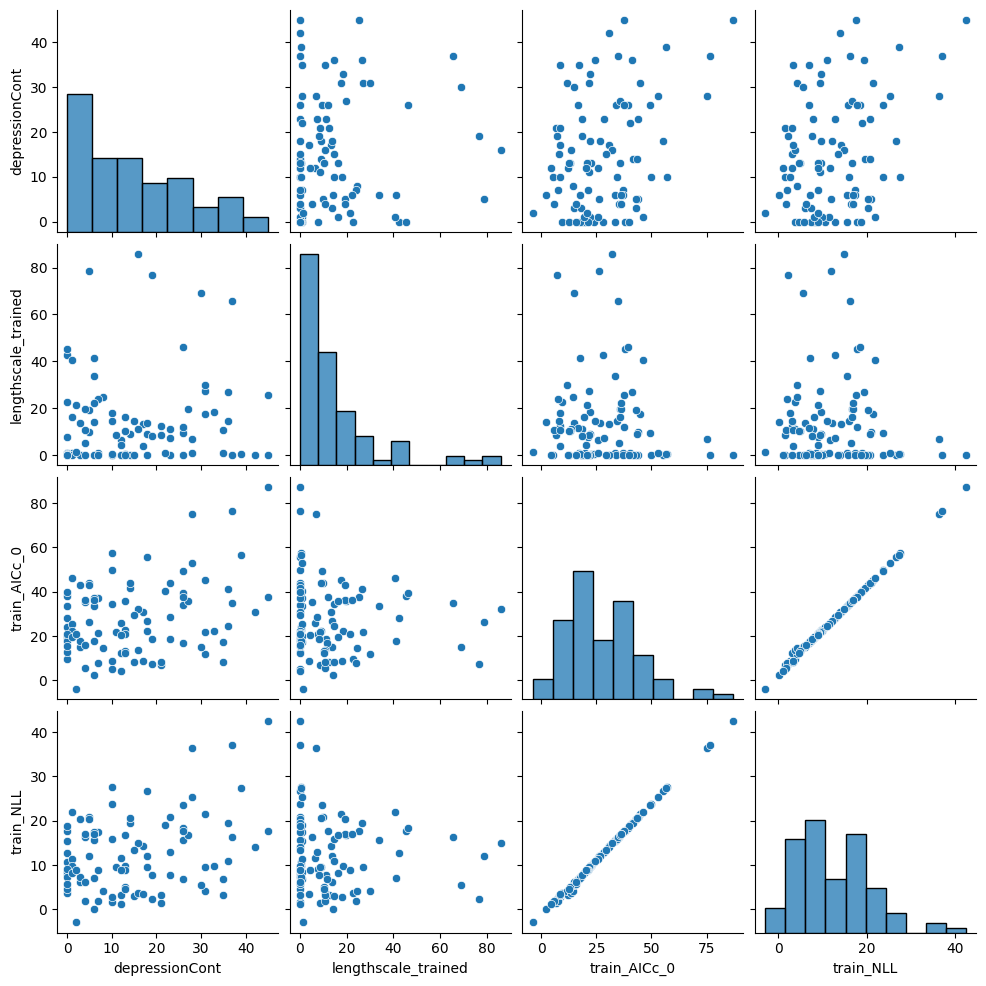

In [72]:
# sns.pairplot(params_participant_data[["depressionCont","src_edge_0_trained","src_content_0_trained","bias_0_trained","edge_0_trained","train_AICc_0","train_NLL"]])

sns.pairplot(params_participant_data[["depressionCont","lengthscale_trained","train_AICc_0","train_NLL"]])

In [79]:
# step 1
results = smf.ols("depressionCont ~  female	+ age + n_not_experienced", data=params_participant_data).fit()
print("== results.summary() ==\n\n",results.summary(),"\n\n == end summary ==")

== results.summary() ==

                             OLS Regression Results                            
Dep. Variable:         depressionCont   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     6.257
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           0.000660
Time:                        16:04:26   Log-Likelihood:                -361.02
No. Observations:                  94   AIC:                             730.0
Df Residuals:                      90   BIC:                             740.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept   

In [83]:
params_participant_data

,depression,depressionCont,female,age,n_not_experienced,participant_id,best_model,train_AICc_0,train_NLL,src_edge_0_trained,edge_0_trained,src_content_0_trained,bias_0_trained
0,0,12,1,29,9,1,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,24.199160,10.813866,NaN,1.0,1.000000,-0.374109
1,0,0,0,41,9,2,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,34.200753,15.814662,NaN,1.0,0.371002,NaN
2,0,13,1,38,6,3,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,22.416025,9.708013,NaN,1.0,-0.184361,NaN
3,1,31,0,67,18,4,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,47.139155,22.444577,NaN,1.0,1.000000,-0.644259
4,0,5,0,40,21,5,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,34.078217,14.705775,NaN,1.0,0.074047,-0.996092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,12,0,31,8,107,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,21.822931,9.578132,NaN,1.0,1.000000,-0.513058
90,1,36,0,22,9,108,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,23.605516,10.517044,-1.436183,1.0,1.000000,NaN
91,0,13,0,21,5,109,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,12.734969,4.700818,NaN,1.0,1.000000,-1.278244
92,0,2,1,20,2,110,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-Fals...,-2.503094,-2.251547,-1.500649,1.0,1.000000,NaN


In [ ]:
params_participant_data["depression_13"] = params_participant_data["depression_13"]

In [84]:
# step 2
results = smf.ols("depression ~  female	+ age + center(n_not_experienced)*center(train_NLL)", data=params_participant_data).fit()
print("== results.summary() ==\n\n",results.summary(),"\n\n == end summary ==")

== results.summary() ==

                             OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.115
Date:                Tue, 22 Jul 2025   Prob (F-statistic):             0.0123
Time:                        16:06:13   Log-Likelihood:                -60.031
No. Observations:                  94   AIC:                             132.1
Df Residuals:                      88   BIC:                             147.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
# step 3
results = smf.ols("depressionCont ~  female	+ age + n_not_experienced * train_AICc_0 + center(src_edge_0_trained) * center(src_content_0_trained) * center(bias_0_trained) * center(edge_0_trained)", data=params_participant_data).fit()
print("== results.summary() ==\n\n",results.summary(),"\n\n == end summary ==")

== results.summary() ==

                             OLS Regression Results                            
Dep. Variable:         depressionCont   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.336
Date:                Tue, 22 Jul 2025   Prob (F-statistic):              0.188
Time:                        14:48:18   Log-Likelihood:                -356.07
No. Observations:                  94   AIC:                             752.1
Df Residuals:                      74   BIC:                             803.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [ ]:
# step 3
results = smf.ols("depressionCont ~  female	+ age + center(n_not_experienced) * center(train_AICc_0) * center(lengthscale_trained)", data=params_participant_data).fit()
print("== results.summary() ==\n\n",results.summary(),"\n\n == end summary ==")

== results.summary() ==

                             OLS Regression Results                            
Dep. Variable:         depressionCont   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     3.243
Date:                Tue, 22 Jul 2025   Prob (F-statistic):            0.00200
Time:                        14:52:46   Log-Likelihood:                -355.91
No. Observations:                  94   AIC:                             731.8
Df Residuals:                      84   BIC:                             757.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
params_participant_data.to_csv("data/params_participant_data.csv")

In [ ]:
depression_mask = data["depression"] == 1
fig = go.Figure()
var_x = "src_content_0_trained"
var_y = "edge_0_trained"
fig.add_trace(
    go.Scatter(
        x = data[depression_mask][var_x],
        y = data[depression_mask][var_y],
        mode = "markers",
        name = "depressed")
)

fig.add_trace(
    go.Scatter(
        x = data[~depression_mask][var_x],
        y = data[~depression_mask][var_y],
        mode = "markers",
        name = "not depressed")
)

depressed_corr = data[depression_mask][[var_x,var_y]].corr().loc[var_x,var_y]
not_depressed_corr = data[~depression_mask][[var_x,var_y]].corr().loc[var_x,var_y]

fig.update_layout(
    xaxis_title=var_x,
    yaxis_title=var_y,
    title = f"depression corr = {depressed_corr:.3f}, not depression corr = {not_depressed_corr:.3f}"
)

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Violin(x=data[depression_mask]["depression"],
              y=data[depression_mask]["edge_0_trained"],
              name="depression",
              side='positive',
              pointpos = -0.5)
)

fig.add_trace(
    go.Violin(x=data[~depression_mask]["depression"],
              y=data[~depression_mask]["edge_0_trained"],
              name="not depression",
              side='positive',
              pointpos = -0.5)
)


fig.update_traces(
    box_visible=True,
    meanline_visible=True,
    points="all")
fig.update_layout(violingap=0, 
                  violinmode='overlay',
                  yaxis_title="edge_0_trained")

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Violin(x=data[depression_mask]["depression"],
              y=data[depression_mask]["src_content_0_trained"],
              name="depression",
              side='positive',
              pointpos = -0.5)
)

fig.add_trace(
    go.Violin(x=data[~depression_mask]["depression"],
              y=data[~depression_mask]["src_content_0_trained"],
              name="not depression",
              side='positive',
              pointpos = -0.5)
)


fig.update_traces(
    box_visible=True,
    meanline_visible=True,
    points="all")
fig.update_layout(violingap=0, 
                  violinmode='overlay',
                  yaxis_title="src_content_0_trained")

fit of avg model
fit fo semantic model 

check depressed vs not depressed

fit difference of tje two 
take the unpenalized in that case


add bias to maternkernel

# Complete GAT

In [49]:
mask_model = all_data["model_id"] == "GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False_edge-True_comb-att-amp-False"
all_data[mask_model]

,participant_id,depression,depressionCont,train_MAE,train_log_likelihood,train_AIC_0,train_AICc_0,model_id,model.n_free_params,bias_0_trained,src_edge_0_trained,src_content_0_trained,edge_0_trained,lengthscale_trained
1222,50,1,15,0.014361,5.446508,-4.893016,-4.893016,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.378881,-0.787120,1.0,0.061965,NaN
1223,49,1,45,0.939108,-17.793077,41.586153,44.586153,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.735222,-0.662492,1.0,0.966014,NaN
1224,35,1,21,0.836566,-5.217613,16.435226,16.435226,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,0.494365,-0.324345,1.0,-0.516884,NaN
1225,26,1,36,0.591602,-22.906285,51.812569,53.312569,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.826746,-0.332923,1.0,-0.215375,NaN
1226,11,1,28,0.490105,-20.671950,47.343901,48.843901,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-1.039630,-0.235602,1.0,-0.027613,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,101,0,13,0.088153,3.131076,-0.262152,23.737848,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.778267,0.104056,1.0,-0.012582,NaN
1312,71,0,7,0.604190,-4.483980,14.967960,14.967960,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.603882,1.069043,1.0,0.280859,NaN
1313,1,0,12,0.725722,-10.410041,26.820081,31.620081,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.555527,0.144267,1.0,-0.598499,NaN
1314,22,1,31,0.454629,-7.027773,20.055546,26.055546,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.623210,-0.485460,1.0,0.786385,NaN


In [50]:
new_data = pd.merge(all_data[mask_model],participant_data,on="participant_id")
new_data

,participant_id,depression_x,depressionCont_x,train_MAE,train_log_likelihood,train_AIC_0,train_AICc_0,model_id,model.n_free_params,bias_0_trained,src_edge_0_trained,src_content_0_trained,edge_0_trained,lengthscale_trained,depression_y,depressionCont_y,female,age,n_not_experienced
0,50,1,15,0.014361,5.446508,-4.893016,-4.893016,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.378881,-0.787120,1.0,0.061965,NaN,1,15,0,39,2
1,49,1,45,0.939108,-17.793077,41.586153,44.586153,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.735222,-0.662492,1.0,0.966014,NaN,1,45,1,31,12
2,35,1,21,0.836566,-5.217613,16.435226,16.435226,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,0.494365,-0.324345,1.0,-0.516884,NaN,1,21,0,27,4
3,26,1,36,0.591602,-22.906285,51.812569,53.312569,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.826746,-0.332923,1.0,-0.215375,NaN,1,36,1,23,20
4,11,1,28,0.490105,-20.671950,47.343901,48.843901,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-1.039630,-0.235602,1.0,-0.027613,NaN,1,28,0,62,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,101,0,13,0.088153,3.131076,-0.262152,23.737848,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.778267,0.104056,1.0,-0.012582,NaN,0,13,0,40,5
90,71,0,7,0.604190,-4.483980,14.967960,14.967960,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.603882,1.069043,1.0,0.280859,NaN,0,7,0,48,4
91,1,0,12,0.725722,-10.410041,26.820081,31.620081,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.555527,0.144267,1.0,-0.598499,NaN,0,12,1,29,9
92,22,1,31,0.454629,-7.027773,20.055546,26.055546,GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True...,3,-0.623210,-0.485460,1.0,0.786385,NaN,1,31,1,33,8


In [51]:
# step 2
results = smf.ols("depression_x ~  female	+ age + n_not_experienced + train_MAE", data=new_data).fit()
print("== results.summary() ==\n\n",results.summary(),"\n\n == end summary ==")

== results.summary() ==

                             OLS Regression Results                            
Dep. Variable:           depression_x   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     3.862
Date:                Thu, 24 Jul 2025   Prob (F-statistic):            0.00611
Time:                        00:30:38   Log-Likelihood:                -60.166
No. Observations:                  94   AIC:                             130.3
Df Residuals:                      89   BIC:                             143.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept   

In [ ]:
# step 3
results = smf.ols("depressionCont_x ~  female + age + n_not_experienced + train_MAE + center(bias_0_trained)*center(edge_0_trained)*center(src_edge_0_trained)", data=new_data).fit()
print("== results.summary() ==\n\n",results.summary(),"\n\n == end summary ==")

== results.summary() ==

                             OLS Regression Results                            
Dep. Variable:       depressionCont_x   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     3.983
Date:                Thu, 24 Jul 2025   Prob (F-statistic):            0.00264
Time:                        00:30:40   Log-Likelihood:                -360.34
No. Observations:                  94   AIC:                             732.7
Df Residuals:                      88   BIC:                             747.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning:

divide by zero encountered in scalar divide



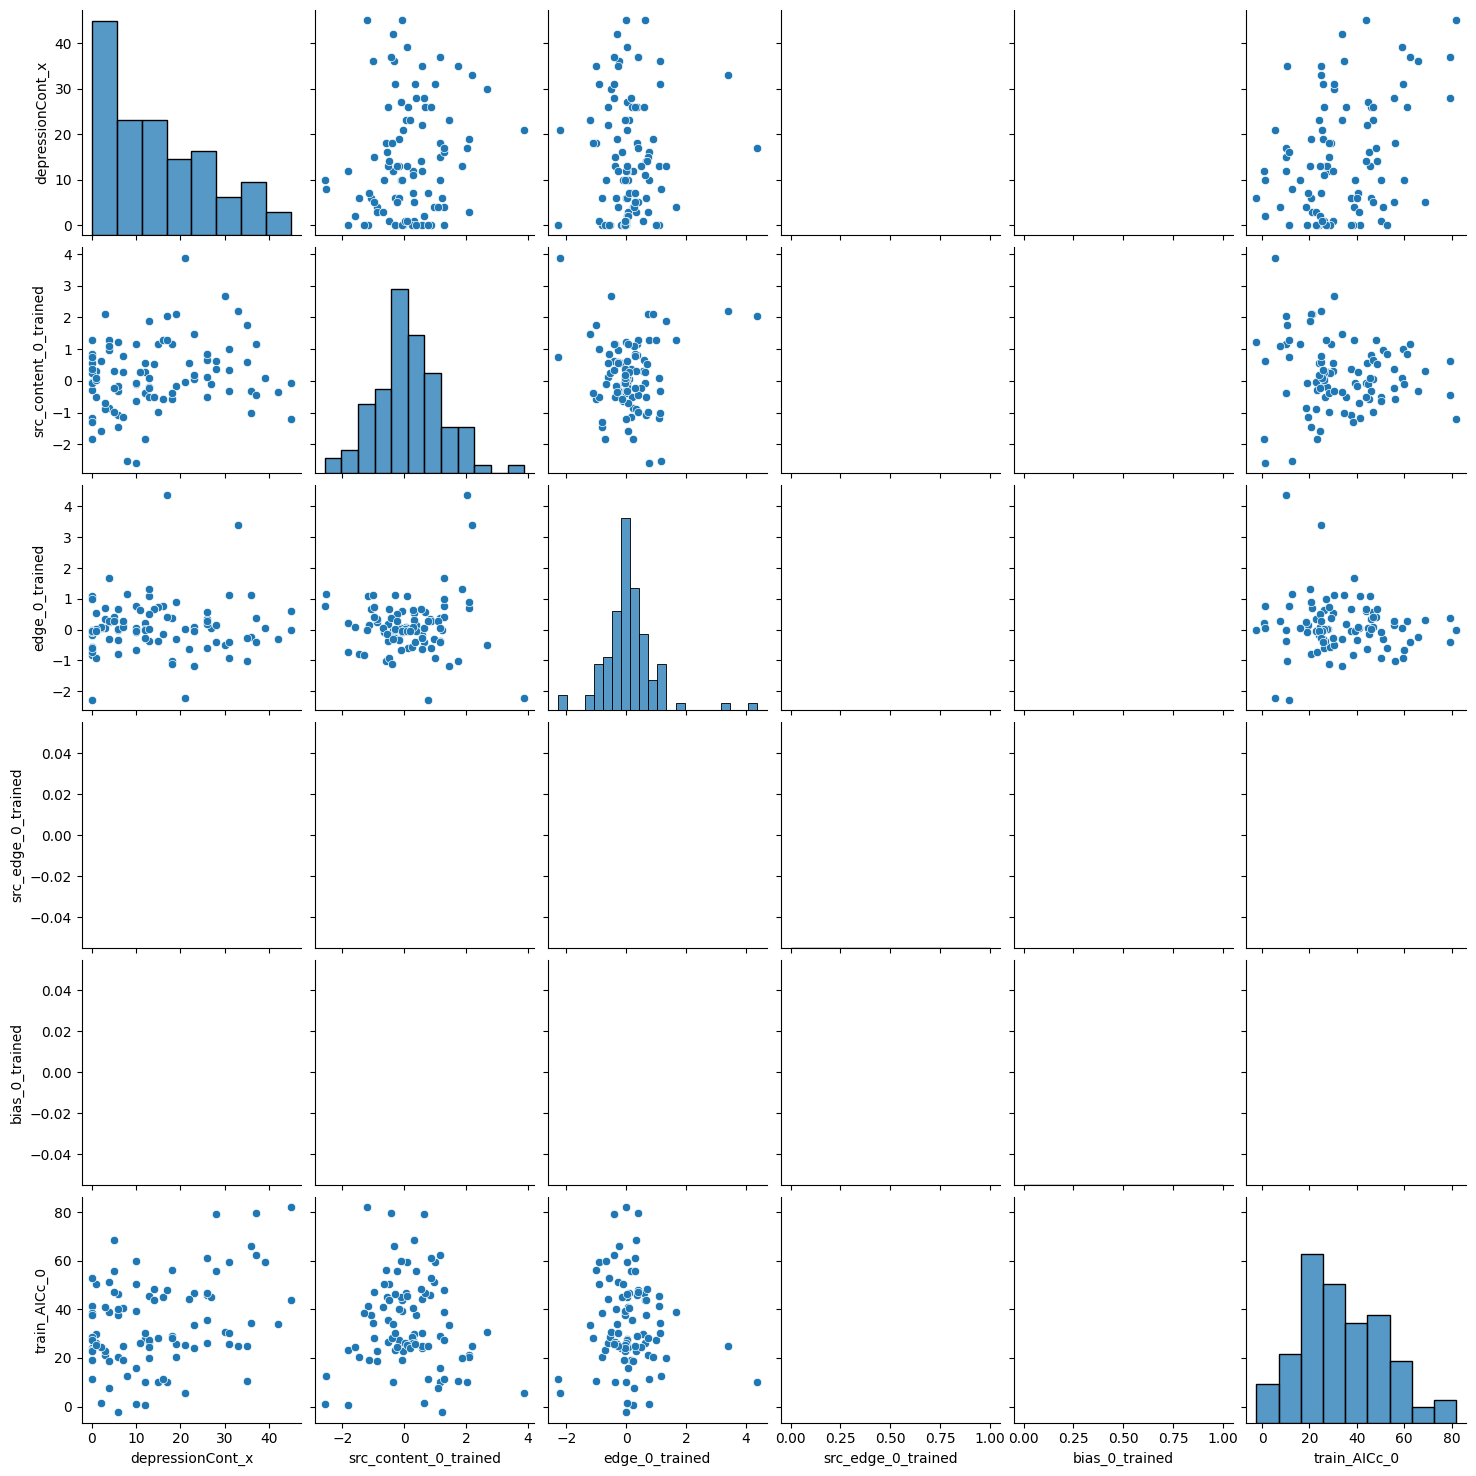

In [47]:
sns.pairplot(new_data[["depressionCont_x","src_content_0_trained","edge_0_trained","src_edge_0_trained","bias_0_trained","train_AICc_0"]])

In [48]:

var_names = ["depressionCont_x","n_not_experienced","train_MAE","src_edge_0_trained","src_content_0_trained","bias_0_trained","edge_0_trained"]

corr = []
p_values = []
for v_name in var_names:
    r,p = stats.pearsonr(new_data[var_names].values,new_data[[v_name]].values)
    corr.append(r)
    p_values.append(p)

text = np.round(corr,3).astype(str)
p_values = np.round(p_values,3).astype(str)

for i in range(text.shape[0]):
    for j in range(text.shape[1]):
        text[i,j] = text[i,j] + " - p:" + p_values[i,j]


fig = go.Figure(data=go.Heatmap(
                    z= corr,
                    x = var_names,
                    y = var_names,
                    text= text,
                    texttemplate="%{text}",
                    textfont={"size":20}))
fig.show()

In [246]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = new_data["bias_0_trained"],
        y = new_data["edge_0_trained"],
        mode = "markers",
        marker=dict(
            color = new_data["depressionCont_x"],
            colorscale='Viridis', # one of plotly colorscales
            showscale=True
        )
    )
)

fig.update_layout(
    xaxis_title = "bias_0_trained",
    yaxis_title = "edge_0_trained"
)
fig.show()

check why GAT model without amp_liking, interaction pos_bias, edge